# 2. Feature Engineering and Data Cleaning

### Dataset preparation

#### Importing nessesary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#### Loading dataset:

In [2]:
data = pd.read_csv(r'./data/bank-additional-full.csv', delimiter = ';')

#### Converting dependent variable categorical to dummy:

In [3]:
data['y'] = data['y'].map({'no': 0, 'yes':1})                  

### Add new features

##### Create new helper feature with age: age_band:

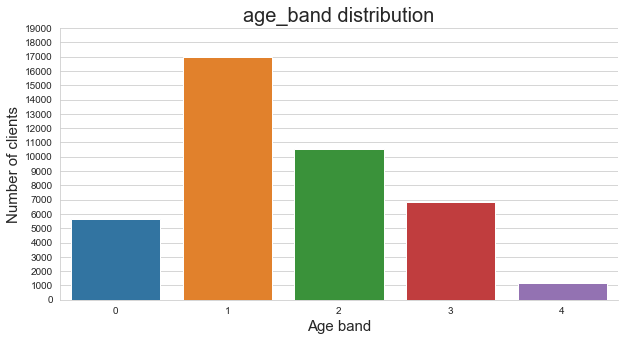

In [4]:
data['age_band'] = 0
data.loc[data['age']   < 30, 'age_band'] = 0
data.loc[(data['age'] >= 30) & (data['age'] < 40), 'age_band'] = 1
data.loc[(data['age'] >= 40) & (data['age'] < 50), 'age_band'] = 2
data.loc[(data['age'] >= 50) & (data['age'] < 60), 'age_band'] = 3
data.loc[data['age']  >= 60, 'age_band'] = 4

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'age_band', data = data)
ax.set_title('age_band distribution', fontsize = 20)
ax.set_xlabel('Age band', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 20000, step = 1000))
sns.despine()

##### Create new feature whether client was not previously contacted: pdays_999:

,pdays_999,0,1
sum,y,967.000000,3673.000000
count,y,1515.000000,39673.000000
mean,y,0.638284,0.092582


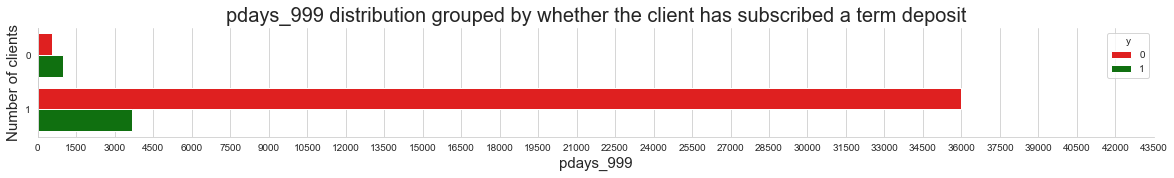

In [5]:
data['pdays_999'] = 0
data.loc[data['pdays'] == 999, 'pdays_999'] = 1
data.loc[data['pdays'] != 999, 'pdays_999'] = 0

fig, ax = plt.subplots()
fig.set_size_inches(20, 2)
sns.countplot(y = 'pdays_999', data = data, hue = 'y', palette = ['red', 'green'])
ax.set_title('pdays_999 distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('pdays_999', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xticks(np.arange(0, 45000, step = 1500))
sns.despine()

data.pivot_table(values = 'y', index = 'pdays_999',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

##### Create new feature whether contact performed before this campaign and for this client previous_0:

,previous_0,0,1
sum,y,1499.000000,3141.000000
count,y,5625.000000,35563.000000
mean,y,0.266489,0.088322


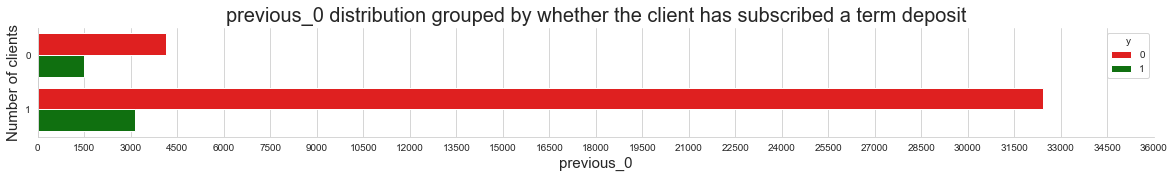

In [6]:
data['previous_0'] = 0
data.loc[data['previous'] == 0,'previous_0'] = 1
data.loc[data['previous'] != 0,'previous_0'] = 0

fig, ax = plt.subplots()
fig.set_size_inches(20, 2)
sns.countplot(y = 'previous_0', data = data, hue = 'y', palette = ['red', 'green'])
ax.set_title('previous_0 distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('previous_0', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xticks(np.arange(0, 37000, step = 1500))
sns.despine()

data.pivot_table(values = 'y', index = 'previous_0',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

##### Create new helper feature campaign_band:

,campaign_band,1,2,3,4,5
sum,y,2300.000000,1211.000000,574.000000,249.000000,306.000000
count,y,17642.000000,10570.000000,5341.000000,2651.000000,4984.000000
mean,y,0.130371,0.114570,0.107471,0.093927,0.061396


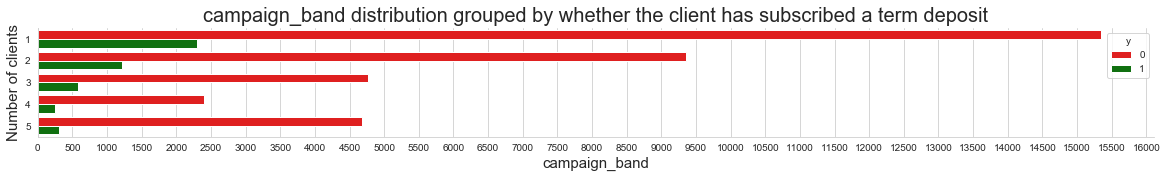

In [7]:
data['campaign_band'] = data['campaign']
data.loc[data['campaign_band'] >= 5,'campaign_band'] = 5

fig, ax = plt.subplots()
fig.set_size_inches(20, 2)
sns.countplot(y = 'campaign_band', data = data, hue = 'y', palette = ['red', 'green'])
ax.set_title('campaign_band distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('campaign_band', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xticks(np.arange(0, 16500, step=500))
sns.despine()

data.pivot_table(values = 'y', index = 'campaign_band',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

### Delete duplicated rows, remove redundant features and replace "unknown" values

##### Delete duplicated rows:

In [8]:
data = data.drop_duplicates()
data = data.reset_index(drop = True)
data.shape

(41176, 25)

##### Dropping redundant features:

In [9]:
data.drop(['default', 'duration', 'pdays', 'previous', 'campaign'], axis = 1, inplace = True)

##### Replace "unknown" value to the most frequent value from one column: 

In [10]:
for i in ['job', 'marital', 'housing', 'loan']:
    # print(data[i].value_counts().index[0])
    data.loc[data[i] == 'unknown', i] = data[i].value_counts().index[0]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   contact         41176 non-null  object 
 7   month           41176 non-null  object 
 8   day_of_week     41176 non-null  object 
 9   poutcome        41176 non-null  object 
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  nr.employed     41176 non-null  float64
 15  y               41176 non-null  int64  
 16  age_band        41176 non-null  int64  
 17  pdays_999       41176 non-null 

### Save preprocessed data

In [12]:
data.to_csv(r'./data/data.csv', sep=';', index=False)